In [6]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read the CSV file
df = pd.read_csv('../logs/stochastic_growth.csv')

# Drop rows where num_pred_classes is NaN or not a number
df = df[pd.to_numeric(df['num_pred_classes'], errors='coerce').notnull()]

# Convert to integer (if not already)
df['num_pred_classes'] = df['num_pred_classes'].astype(int)

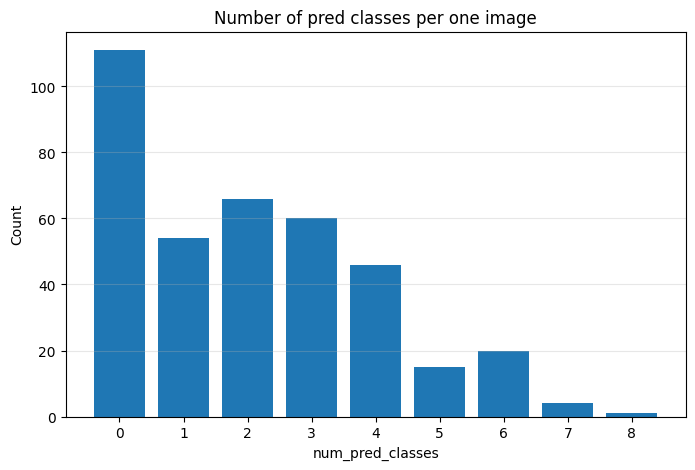

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['num_pred_classes'], bins=range(df['num_pred_classes'].min(), df['num_pred_classes'].max() + 2), align='left', rwidth=0.8)
plt.xlabel('num_pred_classes')
plt.ylabel('Count')
plt.title('Number of pred classes per one image')
plt.xticks(range(df['num_pred_classes'].min(), df['num_pred_classes'].max() + 1))
plt.grid(axis='y', alpha=0.3)
plt.show()

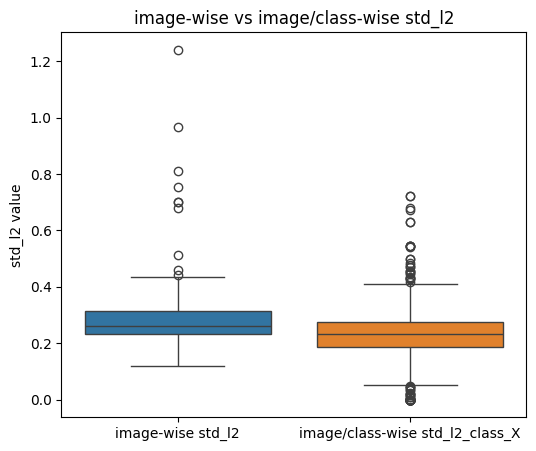

In [20]:
# Boxplot: left = image-wise std_l2, right = all std_l2_class_X (image/class-wise)
import seaborn as sns

imagewise = pd.to_numeric(df['std_l2'], errors='coerce').dropna().values
cellwise = []
for col in df.columns:
    if col.startswith('std_l2_class_'):
        cellwise.extend(pd.to_numeric(df[col], errors='coerce').dropna().values)

plt.figure(figsize=(6, 5))
sns.boxplot(data=[imagewise, cellwise])
plt.xticks([0, 1], ['image-wise std_l2', 'image/class-wise std_l2_class_X'])
plt.ylabel('std_l2 value')
plt.title('image-wise vs image/class-wise std_l2')
plt.show()